In [1]:
import os, sys
try:
    from ..quantata.indicator import *
    from ..quantata.backtest import calc_signal, simulate, calc_asset, calc_return
except ImportError:
    sys.path.append(os.path.dirname(os.path.abspath("./")))
    from quantata.indicator import *
    from quantata.backtest import calc_signal, simulate, calc_asset, calc_return

In [2]:
import pandas as pd
import seaborn as sns
import yfinance as yf
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [3]:
INIT_CAP = 10_000
df = yf.Ticker("AAPL").history(period="1y")
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.0
mean,157.209570,159.215406,155.427116,157.414065,8.800205e+07,0.003571,0.0
std,12.626184,12.653061,12.497261,12.572947,2.657765e+07,0.028184,0.0
min,129.889579,132.206363,128.861003,129.879593,4.100000e+07,0.000000,0.0
25%,147.590479,148.709356,145.701961,147.477566,6.909820e+07,0.000000,0.0
50%,157.349616,159.860667,154.351940,157.166046,8.248645e+07,0.000000,0.0
75%,168.394478,170.609498,166.802427,168.421249,1.002058e+08,0.000000,0.0
max,181.877375,182.186095,178.381831,181.259933,1.954327e+08,0.230000,0.0


In [4]:
df["MA"] = calc_ma(df.Close, 3)
df["EMA"] = calc_ema(df.Close, 3)
df["MACD"] = calc_macd(df.Close, 12, 26)
df["MACDSignal"] = calc_macd_signal(df.Close, 12, 26, 9)
df["MACDOscillator"] = calc_macd_oscillator(df.Close, 12, 26, 9)

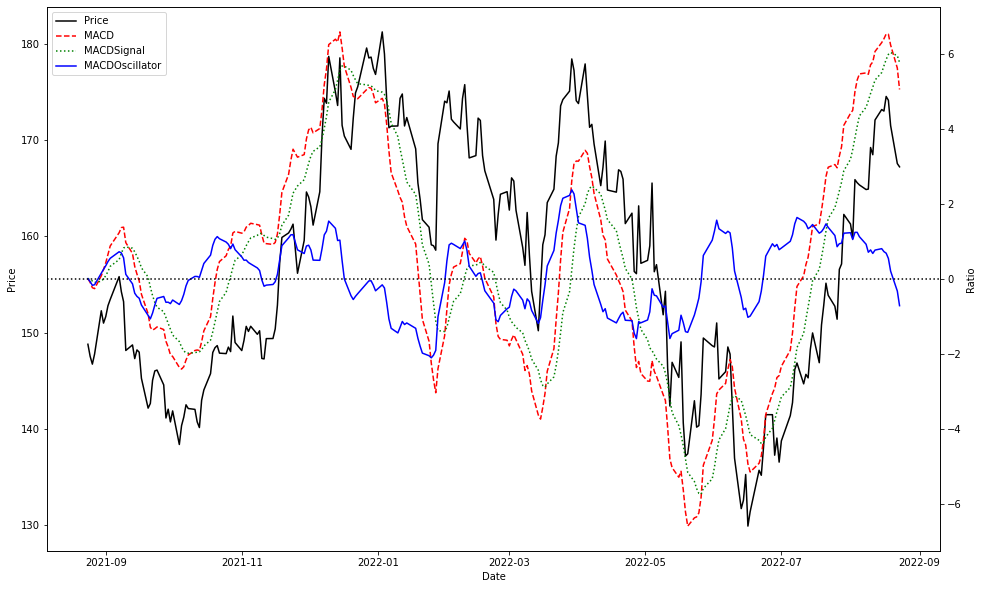

In [5]:
df_new = df[["MACD", "MACDSignal", "MACDOscillator"]].stack().reset_index()
df_new.columns = ["Date", "RatioName", "Ratio"]
plt.subplots(figsize=(16, 10))
ax1 = sns.lineplot(data=df, x="Date", y="Close", legend=False, color="k")
plt.ylabel("Price")
ax2 = ax1.twinx()
sns.lineplot(
    data=df_new, x="Date", y="Ratio", hue="RatioName", legend=False,
    palette={"MACD": "r", "MACDSignal": "g", "MACDOscillator": "b"}, ax=ax2
)
ax2.axhline(y=0, color='k', linestyle=":")
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle(":")
plt.legend(handles=[
    Line2D([0], [0], label="Price", color="k"),
    Line2D([0], [0], label="MACD", color="r", linestyle="--"),
    Line2D([0], [0], label="MACDSignal", color="g", linestyle=":"),
    Line2D([0], [0], label="MACDOscillator", color="b"),
])

In [6]:
df["Signal"] = calc_signal(df.MACDOscillator, 0, 0)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, INIT_CAP)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
print(calc_return(df.Asset))

0.11232467956542969


<AxesSubplot:xlabel='Date', ylabel='Asset'>

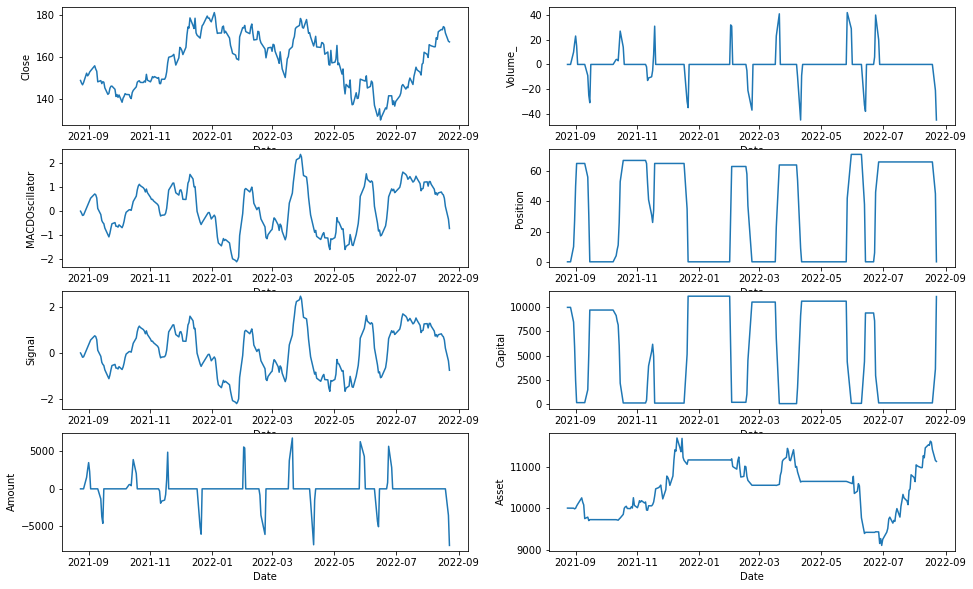

In [7]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="MACDOscillator", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])

In [8]:
df["AU"], df["AD"], df["RSI"] = calc_rsi(df.Close, 14)

c:\Users\ap5176\Data\quantata\quantata\ratio.py:74: RuntimeWarning: invalid value encountered in true_divide
  rsis = aus / (aus + ads) * 100


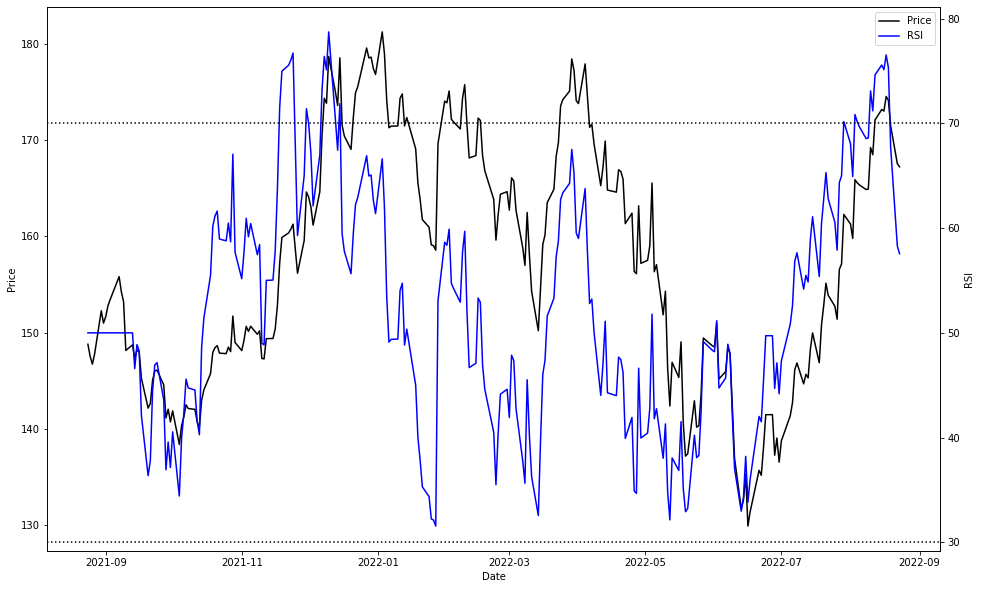

In [9]:
plt.subplots(figsize=(16, 10))
ax1 = sns.lineplot(data=df, x="Date", y="Close", legend=False, color="k")
plt.ylabel("Price")
ax2 = ax1.twinx()
sns.lineplot(data=df, x="Date", y="RSI", legend=False, color="b", ax=ax2)
ax2.axhline(y=70, color='k', linestyle=":")
ax2.axhline(y=30, color='k', linestyle=":")
plt.legend(handles=[
    Line2D([0], [0], label="Price", color="k"),
    Line2D([0], [0], label="RSI", color="b"),
])

In [10]:
df["Signal"] = calc_signal(df.RSI, 30, 70, buy_at_high_ratio=False)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, INIT_CAP)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
print(calc_return(df.Asset))

0.0


<AxesSubplot:xlabel='Date', ylabel='Asset'>

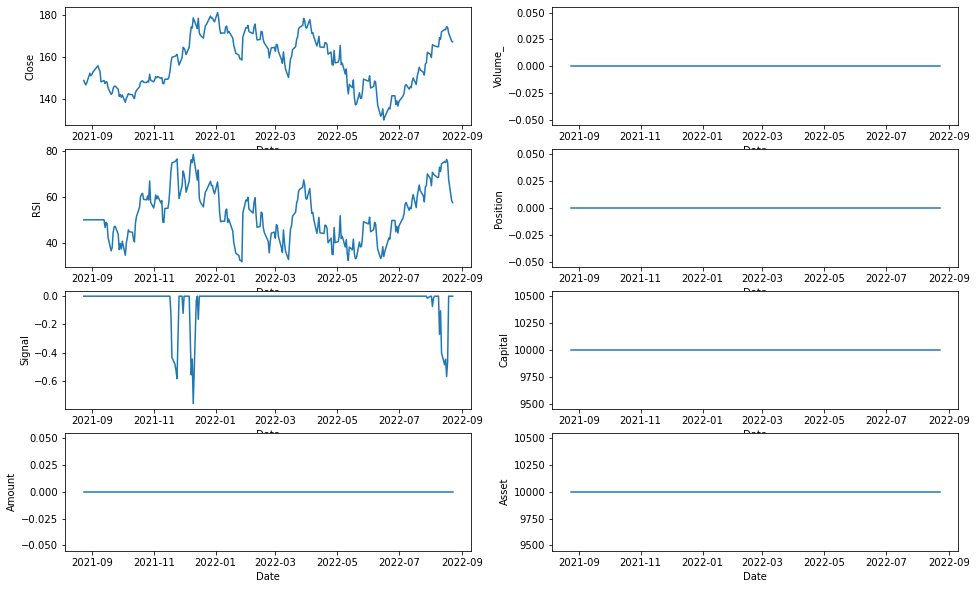

In [11]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="RSI", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])

In [12]:
df["BollingerUB"], df["BollingerLB"] = calc_bollinger(df.Close, 20, 1)
df["BollingerEMAUB"], df["BollingerEMALB"] = calc_bollinger(df.Close, 20, 1, use_ema=True)

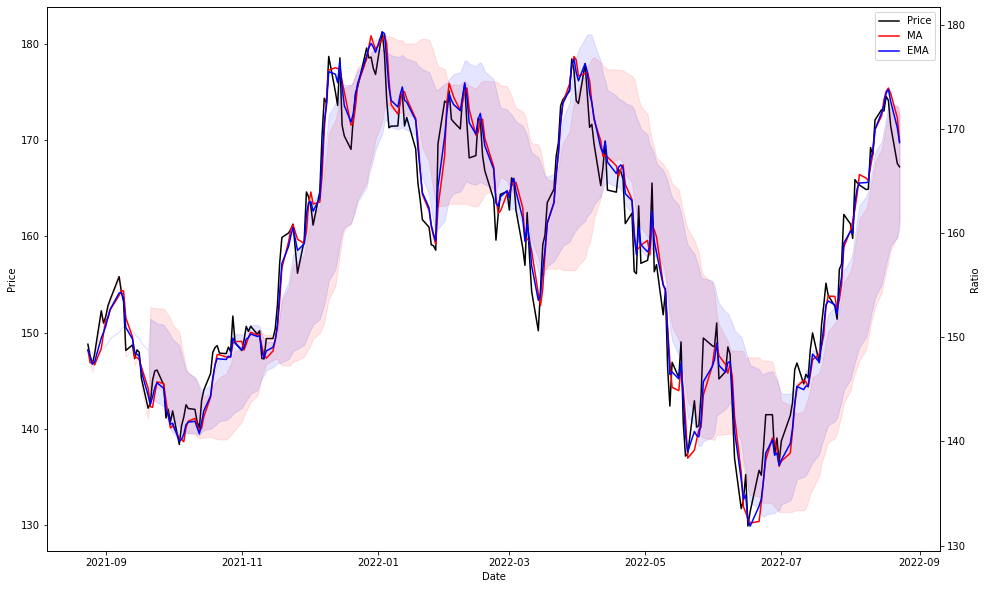

In [13]:
df_new = df[["MA", "EMA"]].stack().reset_index()
df_new.columns = ["Date", "RatioName", "Ratio"]
plt.subplots(figsize=(16, 10))
ax1 = sns.lineplot(data=df, x="Date", y="Close", legend=False, color="k")
plt.ylabel("Price")
ax2 = ax1.twinx()
sns.lineplot(
    data=df_new, x="Date", y="Ratio", hue="RatioName", legend=False,
    palette={"MA": "r", "EMA": "b"}, ax=ax2
)
plt.fill_between(df.index, df.BollingerUB, df.BollingerLB, color="r", alpha=0.1)
plt.fill_between(df.index, df.BollingerEMAUB, df.BollingerEMALB, color="b", alpha=0.1)
plt.legend(handles=[
    Line2D([0], [0], label="Price", color="k"),
    Line2D([0], [0], label="MA", color="r"),
    Line2D([0], [0], label="EMA", color="b"),
])

In [14]:
df["Signal"] = calc_signal(df.Close, df.BollingerLB, df.BollingerLB, buy_at_high_ratio=False)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, INIT_CAP)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
print(calc_return(df.Asset))

0.05538793640136719


<AxesSubplot:xlabel='Date', ylabel='Asset'>

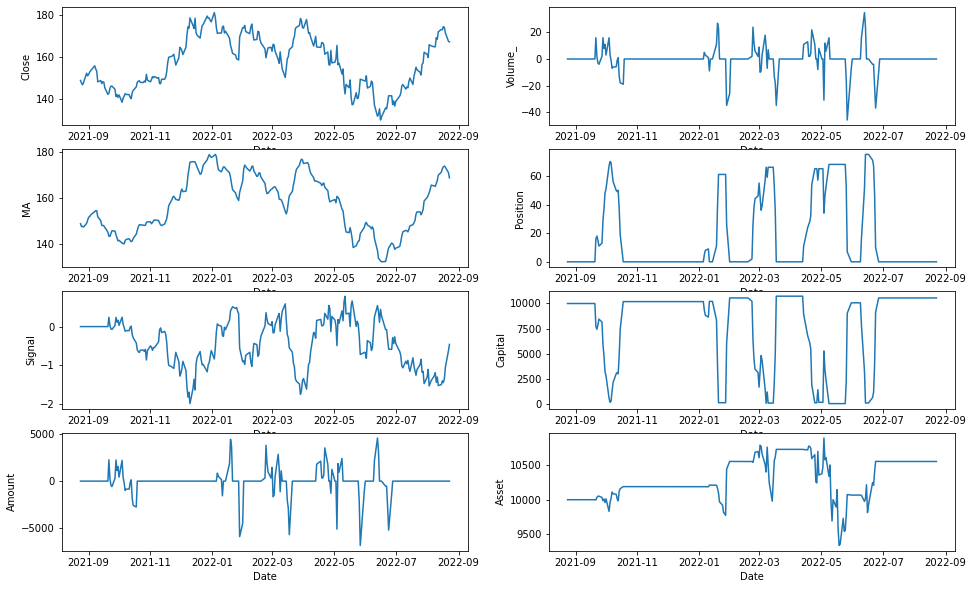

In [15]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="MA", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])

In [16]:
df["Signal"] = calc_signal(df.Close, df.BollingerUB, df.BollingerUB, buy_at_high_ratio=True)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, INIT_CAP)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
print(calc_return(df.Asset))

0.22613079528808594


<AxesSubplot:xlabel='Date', ylabel='Asset'>

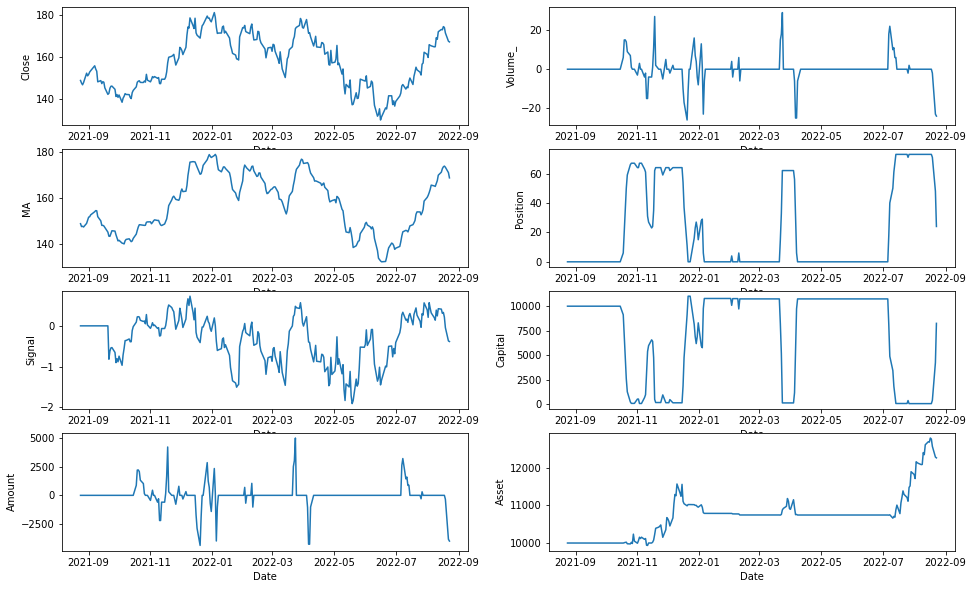

In [17]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="MA", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])

In [18]:
df["Stochastic"] = calc_stochastic(df.Close, 14)
df["StochasticSlowK"], df["StochasticSlowD"] = calc_stochastic_slow(df.Close, 14, 3, 3)

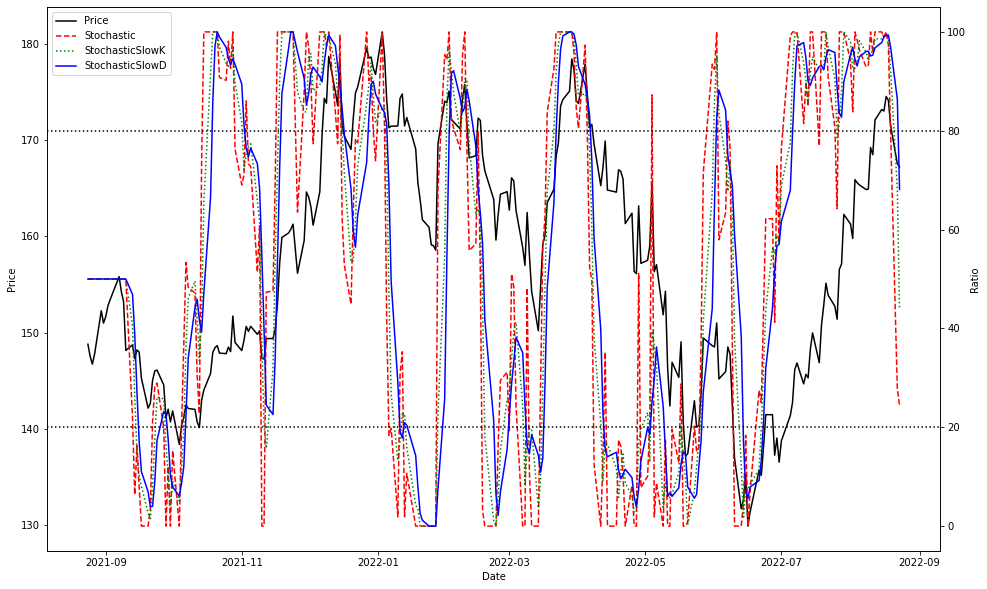

In [20]:
df_new = df[["Stochastic", "StochasticSlowK", "StochasticSlowD"]].stack().reset_index()
df_new.columns = ["Date", "RatioName", "Ratio"]
plt.subplots(figsize=(16, 10))
ax1 = sns.lineplot(data=df, x="Date", y="Close", legend=False, color="k")
plt.ylabel("Price")
ax2 = ax1.twinx()
sns.lineplot(
    data=df_new, x="Date", y="Ratio", hue="RatioName", legend=False,
    palette={"Stochastic": "r", "StochasticSlowK": "g", "StochasticSlowD": "b"}, ax=ax2
)
ax2.axhline(y=80, color='k', linestyle=":")
ax2.axhline(y=20, color='k', linestyle=":")
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle(":")
plt.legend(handles=[
    Line2D([0], [0], label="Price", color="k"),
    Line2D([0], [0], label="Stochastic", color="r", linestyle="--"),
    Line2D([0], [0], label="StochasticSlowK", color="g", linestyle=":"),
    Line2D([0], [0], label="StochasticSlowD", color="b"),
])

In [21]:
df["Signal"] = calc_signal(df.StochasticSlowK, 20, 80, buy_at_high_ratio=False)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, INIT_CAP)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
print(calc_return(df.Asset))

0.021161006164550782


<AxesSubplot:xlabel='Date', ylabel='Asset'>

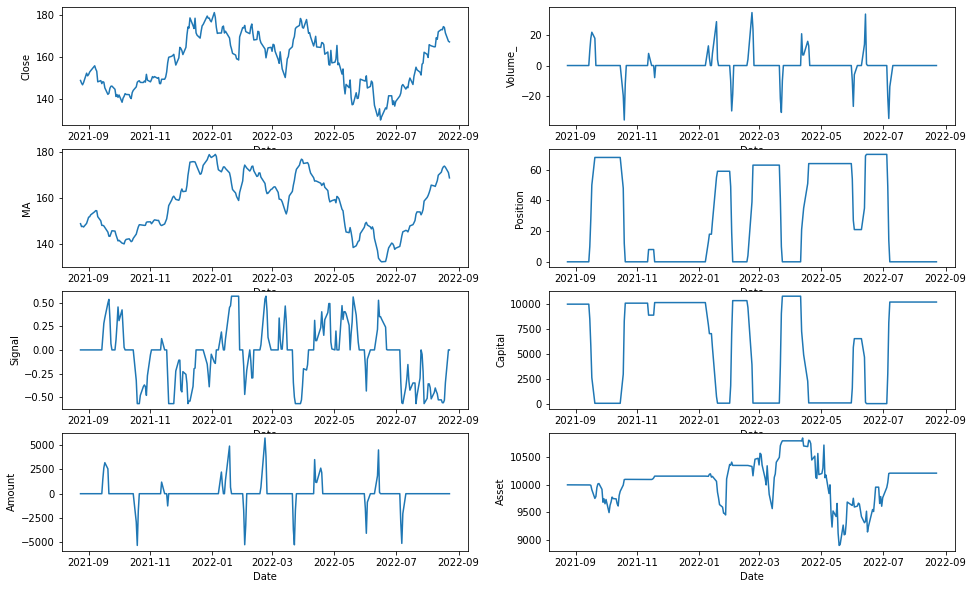

In [22]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="MA", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])

In [23]:
df["Signal"] = calc_signal(df.StochasticSlowD - df.StochasticSlowK, 0, 0, buy_at_high_ratio=True)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, INIT_CAP)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
print(calc_return(df.Asset))

0.05147580108642578


<AxesSubplot:xlabel='Date', ylabel='Asset'>

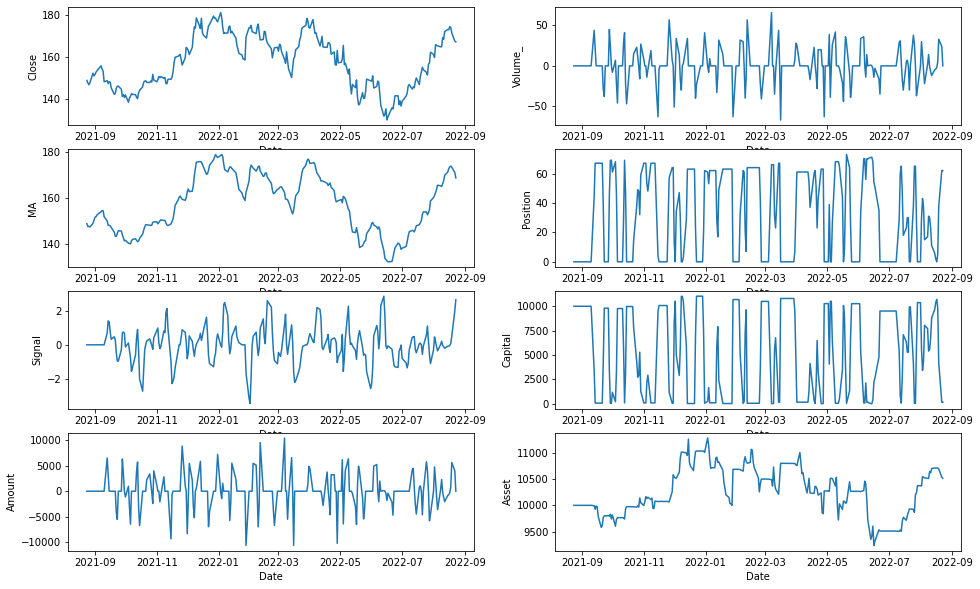

In [24]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="MA", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])